In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime, time

data_dir = '/data/CS120/'
subjects = os.listdir(data_dir)
# subjects = subjects[:2]

timezones = pd.read_csv('../CS120/general/timezones.csv',sep='\t',header=None)
ind_nan = np.where(np.isnan(timezones[1]))[0]
timezones.loc[ind_nan,1]=0

acts = []
emas = []
emss = []

for subj in subjects:
    
    print subj
    
    act = pd.DataFrame(columns=['date','act'])
    if os.path.exists(data_dir+subj+'/act.csv'):
        data = pd.read_csv(data_dir+subj+'/act.csv',sep='\t',header=None)
        # convert timestamps to daystamps
        data[0] = np.floor((data[0]+ 3600*float(timezones.loc[timezones[0]==subj,1]))/86400.0)
        # loading into new matrix
        act['date'] = np.arange(data.loc[0,0],data.loc[data.shape[0]-1,0])
        for (i,da) in enumerate(act['date']):
             act.loc[i,'act'] = np.sum(data.loc[data[0]==da,1]=='BIKING')+np.sum(data.loc[data[0]==da,1]=='ON_FOOT')
    else:
        print ' no act data'
    acts.append(act)


    ema = pd.DataFrame(columns=['date','stress','mood','energy','focus'])
    if os.path.exists(data_dir+subj+'/emm.csv'):
        data = pd.read_csv(data_dir+subj+'/emm.csv',sep='\t',header=None)
        # convert timestamps to daystamps
        data[0] = np.floor((data[0]+ 3600*float(timezones.loc[timezones[0]==subj,1]))/86400.0)
        # loading into new matrix
        ema['date'] = np.arange(data.loc[0,0],data.loc[data.shape[0]-1,0])
        for (i,da) in enumerate(ema['date']):
            ema.loc[i,'stress'] = np.nanmean(data.loc[data[0]==da,1])
            ema.loc[i,'mood'] = np.nanmean(data.loc[data[0]==da,2])
            ema.loc[i,'energy'] = np.nanmean(data.loc[data[0]==da,3])
            ema.loc[i,'focus'] = np.nanmean(data.loc[data[0]==da,4])
    else:
        print ' no ema data'
    emas.append(ema)
        
    ems = pd.DataFrame(columns=['date','duration','quality','daytype'])
    if os.path.exists(data_dir+subj+'/ems.csv'):
        data = pd.read_csv(data_dir+subj+'/ems.csv',sep='\t',header=None)
        # convert timestamps to daystamps
        data[0] = np.floor((data[3]/1000.0+3600*float(timezones.loc[timezones[0]==subj,1]))/86400.0)
        # loading into new matrix
        ems['date'] = np.arange(data.loc[0,0],data.loc[data.shape[0]-1,0])
        for (i,da) in enumerate(ems['date']):
            ems.loc[i,'duration'] = np.nanmean(data.loc[data[0]==da,3]-data.loc[data[0]==da,2])/1000.0
            ems.loc[i,'quality'] = np.nanmean(data.loc[data[0]==da,5])
            if data.loc[data[0]==da,6].size>0:
                ems.loc[i,'daytype'] = data.loc[data[0]==da,6].values[0]
            else:
                ems.loc[i,'daytype'] = np.nan
    else:
        print ' no ems data'
    emss.append(ems)

# aligning the data
data = []
for (i,_) in enumerate(subjects):
    a = pd.merge(emas[i],emss[i],on='date',how='outer')
    a = pd.merge(a,acts[i],on='date',how='outer')
    
    # delayed version
    emas[i]['date'] += 1
    emss[i]['date'] += 1
    acts[i]['date'] += 1
    emas[i].columns = ['date','stress_prev','mood_prev','energy_prev','focus_prev']
    emss[i].columns = ['date','duration_prev','quality_prev','daytype_prev']
    acts[i].columns = ['date','act_prev']
    
    a = pd.merge(a,emas[i],on='date',how='outer')
    a = pd.merge(a,emss[i],on='date',how='outer')
    a = pd.merge(a,acts[i],on='date',how='outer')
    
    data.append(a)
    
with open('data.dat','w') as f:
    pickle.dump(data, f)
f.close()

EW057EV


/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


MQ077WG
1203725
BD921DW
1573207
 no act data
1578395
1464458
1135515
1183252
1521517
1210517
FM387DI
952207
1142152
984221
1553373
1244644
 no act data
1327952
1524496
1559190
1130955
1535103
1381257
1041667
1055808
1483186
1054952
1197009
1385032
IK750RN
IP417XX
1564420
1288818
1571376
1567871
1328568
1374066
EW057DI
 no act data
 no ema data
 no ems data
1536580
XF600QF
1208813
1114936
1165040
 no act data
25349
1234088
827285
FJ227MJ
1124659
1422927
1270329
1219403
345921
1367477
1505268
1579481
HH880DL
HE593LT
WT253RB
606449
UQ050PR
1549226
1312819
428255
 no act data
1013558
1425272
1428949
 no act data
1524947
1533327
1305690
1084240
831987
1079411
1496251
1078563
 no act data
872451
QC647KS
 no act data
249499
828778
1143410
506107
 no act data
616751
1569370
1503395
1388630
1145713
1497026
1444502
820387
1097633
1128660
 no act data
1147164
856513
 no act data
1041304
1307868
1189725
920558
62977
1355344
 no act data
575209
1179075
IQ300QN
1272711
1184498
DB233EI
1022235
129915

In [11]:
data[0]
    

,date,stress,mood,energy,focus,duration,quality,daytype,act,stress_prev,mood_prev,energy_prev,focus_prev,duration_prev,quality_prev,daytype_prev,act_prev
0,16783.0,2,1,1,2,15600,0,normal,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16784.0,2,3.66667,2,2.33333,56400,1,normal,103,2,1,1,2,15600,0,normal,0
2,16785.0,2,3.66667,1.66667,1.66667,20400,1,normal,31,2,3.66667,2,2.33333,56400,1,normal,103
3,16786.0,2,3.33333,2,2,20700,1,normal,28,2,3.66667,1.66667,1.66667,20400,1,normal,31
4,16787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,2,3.33333,2,2,20700,1,normal,28
5,16788.0,1.33333,2.33333,1.77778,2.22222,30900,4,off,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
6,16789.0,2.66667,3,2.33333,2.66667,24600,2,off,41,1.33333,2.33333,1.77778,2.22222,30900,4,off,53
7,16790.0,2,3.33333,2.33333,2,23100,2,normal,48,2.66667,3,2.33333,2.66667,24600,2,off,41
8,16791.0,0.666667,0.666667,0.666667,0.666667,65700,1,normal,20,2,3.33333,2.33333,2,23100,2,normal,48
9,16792.0,1,1.5,1,1.5,24000,2,normal,35,0.666667,0.666667,0.666667,0.666667,65700,1,normal,20


(array([   1.,    0.,    2.,    0.,    2.,    5.,   29.,  111.,   34.,
          12.,    1.,    3.,    1.,    1.,    3.,    0.,    0.,    2.,
           0.,    1.]),
 array([   0. ,    6.9,   13.8,   20.7,   27.6,   34.5,   41.4,   48.3,
          55.2,   62.1,   69. ,   75.9,   82.8,   89.7,   96.6,  103.5,
         110.4,  117.3,  124.2,  131.1,  138. ]),
 <a list of 20 Patch objects>)

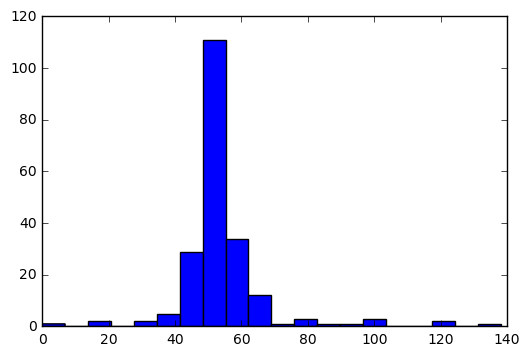

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(n,bins=20)